# Practical 2 

[Nasser-eddine Monir](https://nasseredd.github.io) (CC BY-NC-SA) -- 2025

This practical focuses on preparing data for speech enhancement by exploring key concepts such as normalization, power, and reverberation. You will work with reverberated signals captured through microphones to understand the impact of room acoustics and microphone placement on signal quality. By creating mixtures of speech and noise, the exercise highlights the challenges of interference, artifacts, and distortions. By comparing spectra—such as clean speech against mixtures, noise, or estimated speech—you will explore how these differences affect speech clarity.

The data used in this practical includes speech recordings from the LibriSpeech dataset and noise samples sourced from Freesound. Additionally, Room Impulse Responses (RIRs) provided by Delebecque et al. (2023) are used to simulate realistic reverberation effects, enabling a comprehensive analysis of speech enhancement techniques in diverse acoustic environments.

Guidelines: 
* 👥 Work in pairs to complete the practical.
* 📤 Submit the practical and the data in a zip file named as follows: ```practical-2-<lastname>-<lastname>.zip```. 
* 📧 Ensure the email subject is: ```practical-2-<lastname>-<lastname>```.
* ⏰ The first submission must be completed by **the end** of the session. An optional resubmission is allowed by **Tuesday 28th at 11:59 PM**.
* 💬 Don't forget to leave a comment whenever an observation is requested.

# Imports

In [1]:
import librosa
import soundfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Normalization

$$x_{\text{norm}}(n) = \frac{x(n)}{\max(|x(n)|)}$$

Where:

* $x(n)$: Original speech signal.
* $x_{\text{norm}}(n)$: Normalized speech signal.
* $\max\left(|x(n)|\right)$: The maximum absolute value of the signal $x(n)$.

This ensures the signal amplitude is scaled between $-1$ and $1$.

***
```python
def normalize_signal(signal):
    max_amplitude = np.max(np.abs(signal))
    if max_amplitude == 0:
        return signal
    return signal / max_amplitude
```
***

1. Load a signal from ```data/clean/```.
2. Compute and print the maximum and the minimum amplitudes of the signal.
3. Normalize the signal using ```normalize_signal()``` (above). 
4. Again, compute and print the maximum and the minimum amplitudes of the signal.
5. What do you observe ?

In [ ]:
# TODO: code me!

# Power

Power refers to the average energy of a signal over time. For a discrete-time signal, power is calculated as the mean of the squared amplitudes of the signal. It represents the strength or intensity of the signal.

$$P = \frac{1}{N} \sum_{n=1}^{N} x^2(n)$$

***
```python
def compute_power(signal):
    N = len(signal)
    return np.sum(signal**2) / N
```
***

1. Load the signal from the file ```3947-13262-0000.wav```. 
2. Listen to the signals.
3. Compute the power of the signal using ```compute_power()``` (above).
4. Normalize the signal.
5. Compute the power again.
6. What do you notice ? 

In [3]:
# TODO: code me!

# Reverberated Signal

A **reverberated signal** is the result of a sound wave reflecting off surfaces in an environment (e.g., walls, floors, ceilings) and reaching the listener after multiple delays. Reverberation adds an "echo" or "tail" to the original sound, creating a mix of the direct signal and its reflections.

Mathematically, a reverberated signal $y(n)$ is modeled as the convolution of the original clean signal $x(n)$ with the Room Impulse Response (RIR) $h(n)$:

$$y(n) = x(n) * h(n) = \sum_{k=0}^{M-1} x(k) \cdot h(n-k)$$

Where:
* $y(n)$: Reverberated signal at sample $n$.
* $x(n)$: Original clean signal.
* $h(n)$: Impulse response of the room (RIR).
* $M$: Length of the impulse response $h(n)$.
* $*$: Convolution operator.

An **impulse response** is a sound's "fingerprint" of how it behaves in a space, showing how a single, sharp sound like a clap travels, reflects, and fades in the environment. It captures details like echoes and reverberation, helping us understand the room's acoustic characteristics.

***

1. Import ```convolve``` from ```scipy.signal```.
2. Load the speech signal from the ```7517-100442-0031.wav``` file.
3. Display and listen to the speech signal.
4. Load the room impulse response (RIR) from the ```data/rir/rir_spkr3.npz``` file and select ```'phl_left_front'``` key.
5. Compute the convolution between the dry (anechoic) speech signal and the room impulse response. 
6. Display and listen to the reverberated speech.
7. What do you notice ? 

In [ ]:
# TODO: code me!

# Reverberated Signal with Microphones

In multi-channel setups, like those in hearing aids with multiple microphones, each microphone captures the sound differently due to its specific position. For example, in a pair of hearing aids, microphones on the left ear and right ear experience unique reflections and delays because the sound waves travel through the environment and interact with surfaces like walls, furniture, and even the user's head. These differences between channels provide a richer, more detailed representation of the spatial acoustic environment, helping the hearing aids distinguish between direct sounds and reverberation. This spatial information is crucial for enhancing the clarity of speech and reducing noise in real-world scenarios.

<div style="text-align: center;">
    <img src="https://github.com/Nasseredd/nasseredd.github.io/blob/master/images/hearing-aid-microphones.png?raw=true" alt="Hearing Aid Microphones" width="50%">
</div>

These microphones are designed to capture sounds from different directions, enabling the hearing aid to process spatial audio information effectively. The Figure emphasizes the role of these microphones in providing a multi-channel setup for enhanced sound clarity, noise reduction, and directional hearing, particularly in complex acoustic environments.

In ```data/rir/``` folder, you will find room impulse responses (RIRs) from [Delebecque et al. (2023)](https://hal.science/hal-04193377/document) which are organized as follows: 

| speaker ID | Location                |
| :--------: | :---------------------- |
|      1     | 90° on the left side    |
|      3     | 0° in front of the head |
|      4     | 45° on the right side   |
|      5     | 90° on the right side   |

***

1. Import ```convolve``` from ```scipy.signal```.
2. Load the speech signal from the ```5652-19215-0033.flac``` file.
3. Display and listen to the speech signal.
4. Load the room impulse response (RIR) corresponding to the 90° on the right.
5. Compute the convolution between the dry (anechoic) speech signal and the room impulse response for the front left and the front right microphones (separately).
6. Stack the 2 signals vertically. 
7. Display and listen to the reverberated speech. Select two microphones (channels) for playback, as audio output is limited to stereo (2 channels).
8. What do you notice ?


In [ ]:
# TODO: code me!

9. Do the same to the 3 other angles.

In [ ]:
# TODO: code me!

# Mixtures

A (noisy) mixture is the process of combining a clean speech signal $s$ with a noise signal $n$, to produce a resulting mixture signal $m$. 

$$ m = s + n $$

To control the amount of noise in the mixture, the noise is scaled by a gain factor $\alpha$, as follows: 

$$ m = s + \alpha.n $$ 

such that 

$$\alpha = \sqrt{\frac{P_s}{P_n \cdot 10^{\frac{\text{SNR}_{dB}}{10}}}}$$ 

***
```python
def compute_gain(speech_signal, noise_signal, SNR_dB):
    P_s = np.mean(speech_signal ** 2) # Compute the power of the speech signal (P_s)
    P_n = np.mean(noise_signal ** 2) # Compute the power of the noise signal (P_n)
    alpha = np.sqrt(P_s / (P_n * 10 ** (SNR_dB / 10))) # Compute the gain alpha
    return alpha
```

‎

**Proof**: How did we find the scale factor (gain) $\alpha$? (Not required to know)
*** 

To address this, we use the Signal-to-Noise Ratio (SNR), defined as: 

$$ \text{SNR}_{dB} = 10.log_{10} (\frac{P_s}{P_{n'}}) $$

Where, 
* $n'$ is the scaled noise ($n' = \alpha.n$)
* $P_s$: Power of the clean speech signal $s$.
* $P_{n'}$: Power of the noise signal $n'$.

As we've seen previously, the 
- A positive $\text{SNR}_{dB}$ means that the speech signal power is greater than the noise power.
- A zero $\text{SNR}_{dB}$ means that the speech signal power is equal to the noise power.
- A negative $\text{SNR}_{dB}$ means that the noise power is greater than the speech signal power.

$$ 
  \text{SNR}_{dB} = 10 \cdot \log_{10} \left( \frac{P_s}{P_{n'}} \right) 
  \implies \frac{\text{SNR}_{dB}}{10} = \log_{10} \left( \frac{P_s}{P_{n'}} \right) 
  \implies 10^{\frac{\text{SNR}_{dB}}{10}} = \frac{P_s}{P_{n'}} 
  \implies \frac{P_s}{\alpha^2 \cdot P_n} = 10^{\frac{\text{SNR}_{dB}}{10}} 
  \implies \alpha^2 = \frac{P_s}{P_n \cdot 10^{\frac{\text{SNR}_{dB}}{10}}} 
  \implies \alpha = \sqrt{\frac{P_s}{P_n \cdot 10^{\frac{\text{SNR}_{dB}}{10}}}}
$$
*** 

Create a function that 
1. Loads a speech signal from a given file path.
2. Loads a noise signal from a given file path.
3. Loads a speech RIR from a given file path.
4. Loads a noise RIR from a given file path.
5. Returns the four signals.

In [ ]:
# TODO: code me!
def load_signals():
    pass

Create a function that 
1. Loads the speech, speech_rir, noise and noise_rir signals using ```load_signals()``` function.
2. Normalizes the speech and noise signals.
3. Compute the gain using ```compute_gain()``` function.
4. Scale the noise (as per the given formula). 
5. Create a reverberated speech (as discussed in the previous section)
6. Create a reverberated (scaled) noise (as discussed in the previous section).
7. Create and return the mixture.

In [ ]:
# TODO: code me!
def create_mixture():
    pass

Let's test our function with an example 
1. Declare four variables corresponding to the following signals:
    * the ```6064-56168-0017.flac``` speech signal.
    * The speech RIR corresponds to simulating the speech coming from the front.
    * the ```243637_93.wav``` noise signal.
    * The noise RIR corresponds to simulating the noise on the left side.
2. Create a mixture using the ```create_mixture()``` function.
3. Display and listen to the mixture.

You can choose several $\text{SNR}_{dB}$ !

In [ ]:
# TODO: code me!

# Spectrum

A **spectrum** represents the distribution of a signal's energy or power across different frequencies. It provides insight into the frequency components that make up the signal, showing which frequencies are dominant or present. Spectra are typically obtained using Fourier Transform techniques, which decompose a time-domain signal into its frequency-domain representation.

The ```compute_spectrum``` function calculates the single-sided frequency spectrum of a given signal by applying the Fourier Transform, extracting positive frequencies, and computing their magnitudes. The ```overlay_spectra``` function uses compute_spectrum to compute and plot the spectra of two signals, overlaying them on a logarithmic scale, with the second signal highlighted using a translucent fill. The purpose of the ```overlay_spectra``` function is to compare the frequency spectra of two signals by plotting them on the same logarithmic scale. This allows for an intuitive analysis of the frequency content of both signals, making it easy to identify differences or overlaps in their spectral characteristics.

In [2]:
# TODO: run me! 
def compute_spectrum(signal):
    """
    Compute the spectrum of an audio file.
    """

    # Compute the Spectrum (Fourier Transform)
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(fft_result), d=1/sr)

    # Only keep the positive frequencies (single-sided spectrum)
    positive_freq_indices = frequencies > 0
    positive_frequencies = frequencies[positive_freq_indices]
    positive_magnitudes = np.abs(fft_result[positive_freq_indices])
    return positive_frequencies, positive_magnitudes

In [3]:
# TODO: run me! 
def overlay_spectra(s1, s2, s1_name='Speech', s2_name='Noise', title=None):

    # Compute Spectrum
    s1_pos_freq, s1_pos_mag = compute_spectrum(s1)
    s2_pos_freq, s2_pos_mag = compute_spectrum(s2)

    # Plot the Spectrum on a Logarithmic Scale
    plt.figure(figsize=(12, 6))

    # Plot s1 spectrum
    plt.loglog(s1_pos_freq, s1_pos_mag, label=f'{s1_name} Spectrum', color='blue')

    # Plot s2 spectrum and fill area under it with transparency
    plt.loglog(s2_pos_freq, s2_pos_mag, label=f'{s2_name} Spectrum', color='red')
    plt.fill_between(s2_pos_freq, s2_pos_mag, color='red', alpha=0.4)

    # Add labels, grid, and title
    if title == None:
        plt.title(f'Frequency Spectrum of {s1_name} and {s2_name} Signals')
    else:
        plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_subplots(nb_rows, nb_cols, list_spectra):
    fig, axes = plt.subplots(nb_rows, nb_cols)
    for i, ax in enumerate(axes):
        ax.xlabel('Frequency (Hz)')
        ax.ylabel('Magnitude')
        ax.legend()
        ax.plot(list_spectra[i])
    

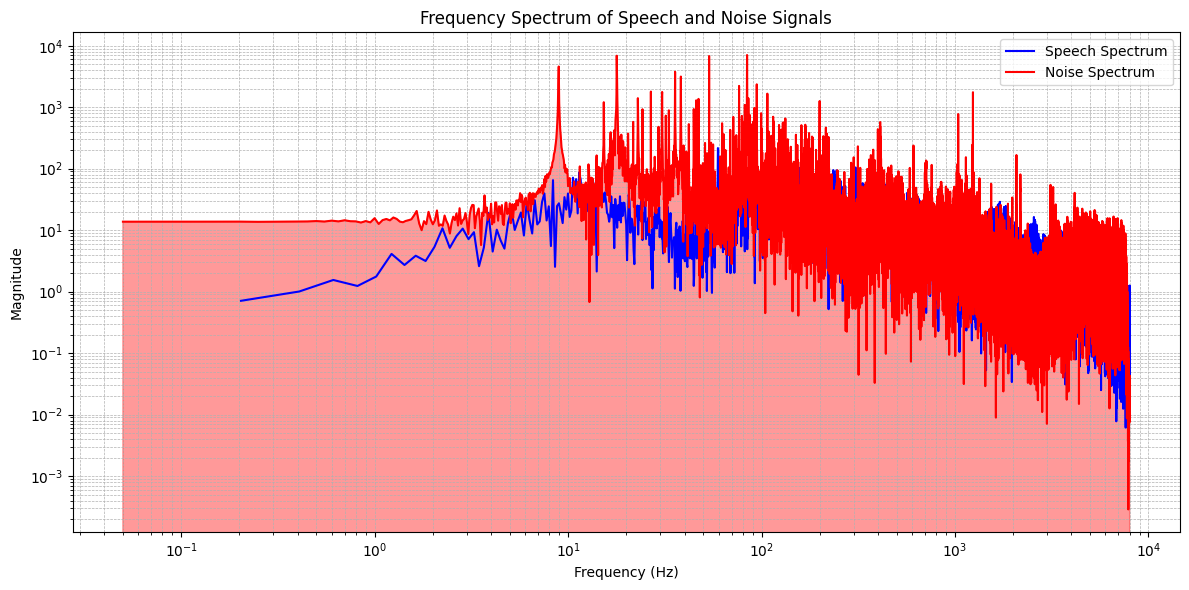

In [5]:
# TODO: run me! 
speech, sr = librosa.load('data/clean/61-70968-0000.wav', sr=16000, mono=True)
noise, sr = librosa.load('data/noise/173390_103.wav', sr=16000, mono=True)
overlay_spectra(s1=speech, s2=noise)

# A Quick Start: Speech Enhancement Algorithms

A **speech enhancement** algorithm aims to improve the quality and intelligibility of speech signals by reducing unwanted noise or distortions. These algorithms analyze the speech and noise components, often using techniques such as filtering, spectral subtraction, or deep learning, to suppress noise while preserving the speech's natural characteristics. Speech enhancement is widely used in applications like hearing aids, telecommunication, and speech recognition systems to ensure clearer audio in noisy environments.

In the folder ```data/samples/121-121726-0000/0dBS0N90```, we've provided targets (speech and noise signals), mixtures and estimated speech signals using two different speech enhancement algorithms: [FaSNet-TAC](https://arxiv.org/pdf/1910.14104) and [Tango](https://hal.science/hal-02985867/file/furnon.pdf).

1. Load and display 
    * the clean speech (reverberated)
    * the mixture 
    * the estimated speech using FaSNet
    * the estimated speech using Tango
2. Plot the overlay spectra of
    * clean speech vs noise
    * clean speech vs mixture
    * clean speech vs estimated speech from FaSNet
    * clean speech vs estimated speech from Tango 
    in 4 (sub)plots.

In [30]:
# TODO: code me! 
from IPython.display import Audio
# Load and display the clean speech 
speech, sr = librosa.load('data/samples/121-121726-0000/0dBS0N90/targets/reverberated_speech.wav')
Audio(speech, rate=sr)


In [31]:
# Load and display the mixture
speech_mixture, sr_mixture = librosa.load('data/samples/121-121726-0000/0dBS0N90/targets/mixture.wav')
Audio(speech_mixture, rate=sr_mixture)

In [32]:
# Estimated speech using FaSNet
speech_fasnet, sr_fasnet = librosa.load('data/samples/121-121726-0000/0dBS0N90/estimated_targets/fasnet/estimated_speech_ch0.wav')
Audio(speech_fasnet, rate=sr_fasnet)

In [33]:
speech_fasnet2, sr_fasnet2 = librosa.load('data/samples/121-121726-0000/0dBS0N90/estimated_targets/fasnet/estimated_speech_ch2.wav')
Audio(speech_fasnet2, rate=sr_fasnet2)

In [34]:
# Estimated speech using Tango
speech_tango, sr_tango = librosa.load('data/samples/121-121726-0000/0dBS0N90/estimated_targets/tango/estimated_speech_ch0.wav')
Audio(speech_tango, rate=sr_tango)

In [35]:
# Estimated speech using Tango
speech_tango2, sr_tango2 = librosa.load('data/samples/121-121726-0000/0dBS0N90/estimated_targets/tango/estimated_speech_ch2.wav')
Audio(speech_tango2, rate=sr_tango2)

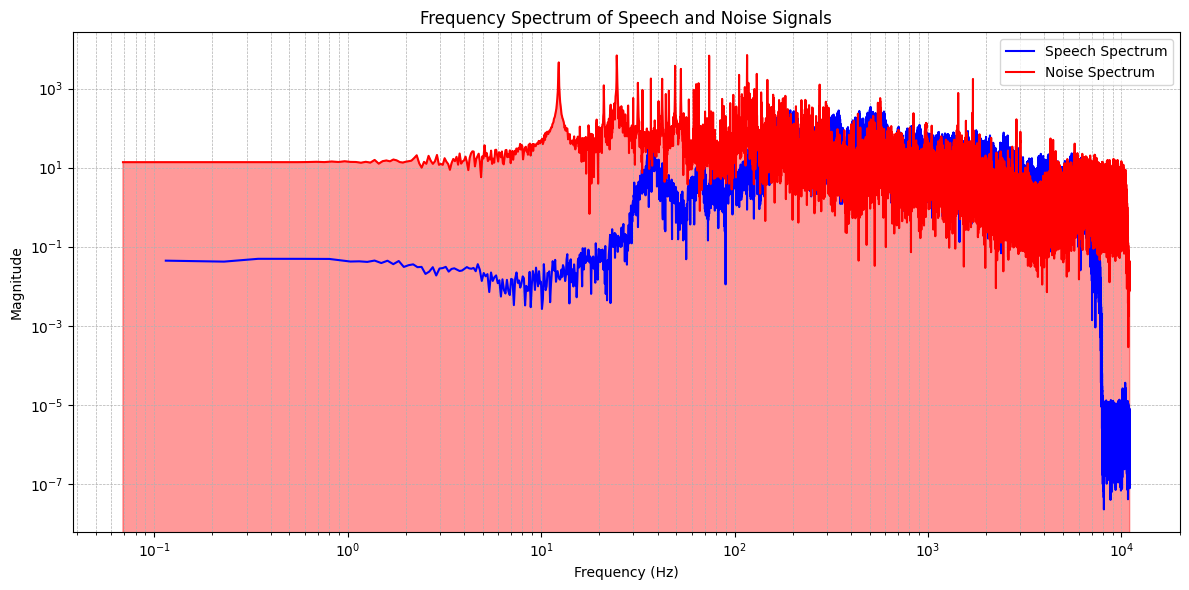

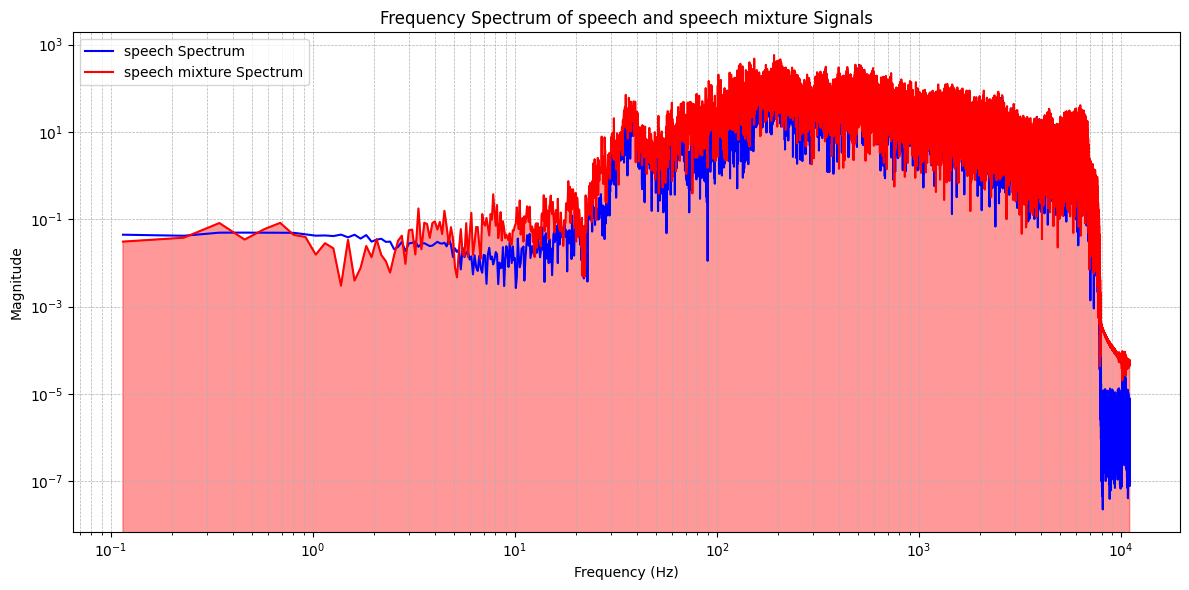

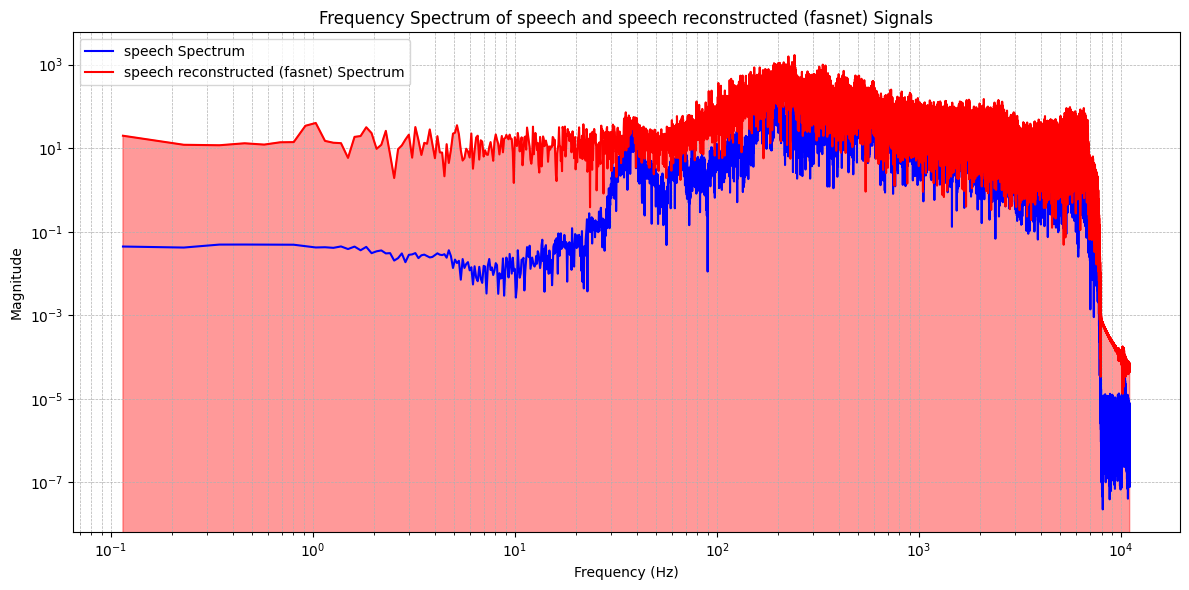

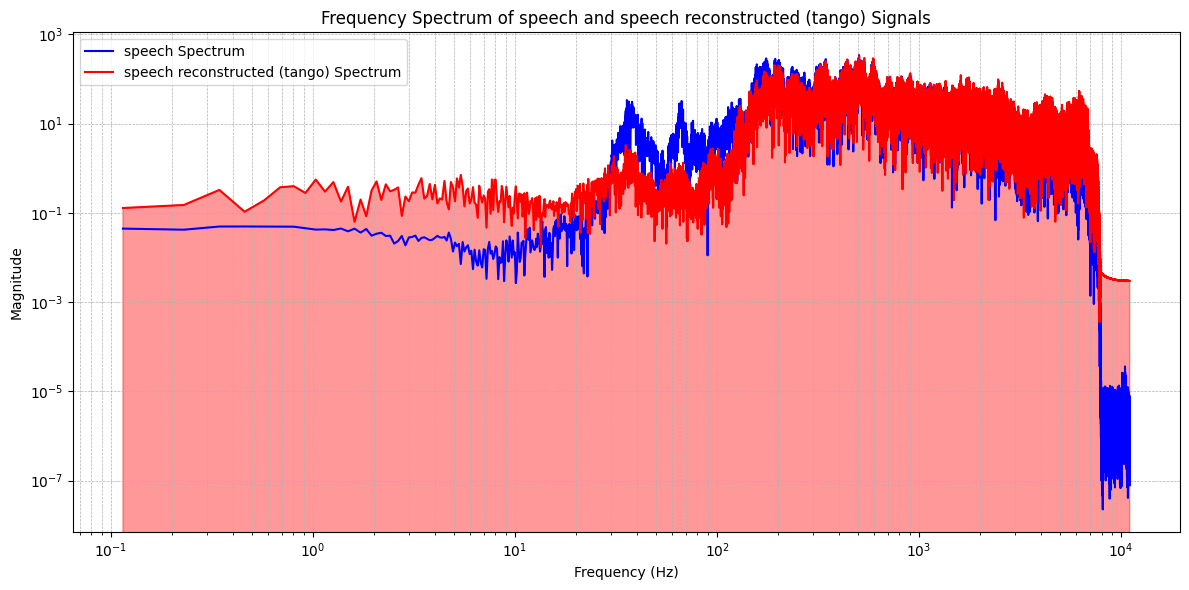

[None, None, None, None]

In [36]:
[overlay_spectra(speech, noise),
                    overlay_spectra(speech, speech_mixture, s1_name="speech", s2_name="speech mixture"),
                     overlay_spectra(speech, speech_fasnet, s1_name="speech", s2_name="speech reconstructed (fasnet)"),
                     overlay_spectra(speech, speech_tango, s1_name="speech", s2_name="speech reconstructed (tango)")
]
#plt.show()

### Interference

In speech enhancement, interference refers to unwanted noise or sounds that **already exist** in the environment and overlap with the speech signal you want to improve. This noise can come from things like background chatter, machinery, or traffic. Interference makes it harder to hear or understand the speech, and one of the primary goals of speech enhancement is to reduce this noise while keeping the speech clear and natural.

The level of interference is quantified using the Signal-to-Interference Ratio (SIR), which, in the context of speech enhancement, is equivalent to the Signal-to-Noise Ratio (SNR). The reasoning behind this equivalence will be explained later.


***
```python 
def compute_sir(clean_speech, interference):
    power_speech = np.sum(clean_speech ** 2) # Compute the power of the clean speech signal
    power_interference = np.sum(interference ** 2) # Compute the power of the interference
    sir = 10 * np.log10(power_speech / power_interference) # Compute the SIR in dB
    return sir
```
*** 

To evaluate the improvement of the speech enhancement model in terms of interference reduction, we measure the Signal-to-Interference Ratio (SIR) at two levels: the input mixture ($\text{SIR}_{\text{in}}$) and the estimated speech ($\text{SIR}_{\text{out}}$). The difference between these two values quantifies the model's performance and is calculated as:

$$\Delta_{\text{SIR}} = \text{SIR}_{\text{out}} - \text{SIR}_{\text{in}}$$

Where:
* $\text{SIR}_{\text{in}}$ is the SIR between the clean speech and the input mixture.
* $\text{SIR}_{\text{out}}$ is the SIR between the clean speech and the estimated (enhanced) speech.

This improvement metric indicates how effectively the model reduces interference noise while preserving the speech signal.
*** 

Compute the $\Delta_{\text{SIR}}$ on the previous example for the two SE models. 

In [40]:
# TODO: code me!

def compute_sir(clean_speech, interference):
    power_speech = np.sum(clean_speech ** 2) # Compute the power of the clean speech signal
    power_interference = np.sum(interference ** 2) # Compute the power of the interference
    sir = 10 * np.log10(power_speech / power_interference) # Compute the SIR in dB
    return sir

#print(compute_sir (speech, speech_mixture) - compute_sir (speech, speech_fasnet2))
print("delta sir tango", compute_sir (speech, speech_mixture) - compute_sir (speech, speech_tango))
print("delta sir fasnet",compute_sir (speech, speech_mixture) - compute_sir (speech, speech_fasnet) )

delta sir tango -1.8412604
delta sir fasnet 7.1750975


In [46]:
Audio (speech_mixture, rate=sr)

### Artifacts

**Artifacts** refer to undesired distortions or anomalies **introduced** into the audio signal as a result of processing (here, the speech enhancement algorithm). These distortions are not part of the original clean signal and often degrade the perceived quality and naturalness of the enhanced audio.

(We will explore this in the next practical session)

### Distortions

In speech enhancement, distortions include artifacts and interference, which together represent unwanted deviations from the clean speech signal. These distortions affect the quality and naturalness of the enhanced speech.


The formula for the **Signal-to-Distortion Ratio (SDR)** is given by:

$$\text{SDR} = 10 \cdot \log_{10} \left( \frac{\| \mathbf{s} \|^2}{\| \mathbf{e} \|^2} \right)$$

Where:
* $\mathbf{s}$: The reference clean signal.
* $\mathbf{e} = \hat{\mathbf{s}} - \mathbf{s}$: The distortion, which is the difference between the estimated signal $\hat{\mathbf{s}}$ and the clean reference signal $\mathbf{s}$.
* $\| \cdot \|$: The Euclidean norm, representing the signal power.

In essence, SDR quantifies the ratio between the power of the clean signal and the power of the distortion introduced during processing. A higher SDR indicates better signal quality with fewer distortions.
***

* Create a function ```compute_sdr()``` to compute the Signal-to-Distortion Ratio (SDR) between a reference signal and an estimated signal.
* Use this function to calculate the SDR between the clean speech and the estimated speech produced by the two models: FaSNet and Tango.

In [50]:
# TODO: code me!
    
def compute_sdr (reference, estimated):
    s  =  np.sum(reference**2)
    e = np.sum ((reference - estimated)**2)
    return 10*np.log10 (s/e)
    

print("SDR fasnet", compute_sdr(speech, speech_fasnet))

print("SDR tango", compute_sdr(speech, speech_tango))
    

SDR fasnet -8.187862
SDR tango 5.888976
